### Configuração Inicial

In [1]:
import numpy as np
import pandas as pd
import statistics
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
funcao_afim = lambda x: (0.5 * x) + 1

In [3]:
valores_x = [-2, -1, 0 , 1 , 2]

valores_y = list(map(funcao_afim, valores_x));

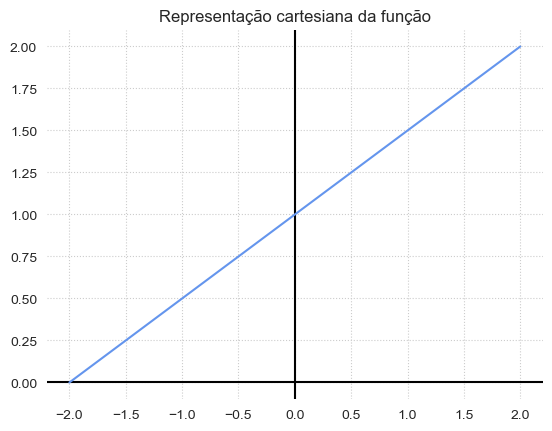

In [4]:
fig, ax = plt.subplots()

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

plt.grid(linestyle='dotted')
ax.spines[["top","bottom","left","right"]].set_visible(False)

plot = sns.lineplot(
    x=valores_x, y=valores_y, color="cornflowerblue",ax=ax).set(
    title="Representação cartesiana da função")

In [36]:
def correlacao_pearson(x, y):
    if len(x)==len(y) and (isinstance(x, np.ndarray) and isinstance(y, np.ndarray)):
        somatoria_medias = sum((x - x.mean()) * (y - y.mean()))
        somatoria_x_quadrado = sum((x - x.mean()) ** 2)
        somatoria_y_quadrado = sum((y - y.mean()) ** 2)       
        valor_final = somatoria_medias / np.sqrt(somatoria_x_quadrado * somatoria_y_quadrado)
        return valor_final

# correlacao_pearson(np.array(valores_x),np.array(valores_y))

# np.correlate(np.array(valores_x),np.array(valores_y))

# statistics.correlation(valores_x, valores_y)

# df.corr(method="pearson")

### Modelagem da Regressão

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

model_scikit = LinearRegression()
admission = pd.read_csv("Admission_Predict.csv")
admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


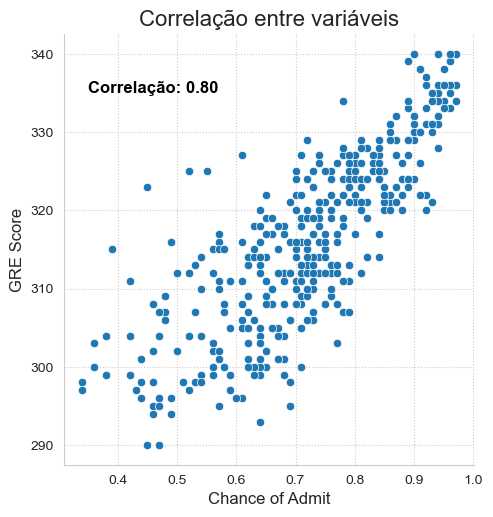

In [62]:
GRE_correlation = statistics.correlation(
    admission["GRE Score"], admission["Chance of Admit "]
)

sns.relplot(
    y=admission["GRE Score"], x=admission["Chance of Admit "]
)

plt.title('Correlação entre variáveis', fontsize=16)
plt.xlabel('Chance of Admit', fontsize=12)
plt.ylabel('GRE Score', fontsize=12)

plt.text(
    x = 0.35, y = 335, 
    s = f"Correlação: {GRE_correlation:.2f}", 
    horizontalalignment='left', size='large', color='black', weight='bold')

plt.grid(linestyle='dotted')

In [7]:
X = admission.drop(columns="GRE Score")
Y = admission["GRE Score "]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=42)

x_train_simple = x_train["year"].to_numpy().reshape((-1, 1))
x_test_simple = x_test["year"].to_numpy().reshape((-1, 1))

In [8]:
model_sm = sm.OLS(y_train, sm.add_constant(x_train_simple))
resultado = model_sm.fit()
print(resultado.params)
print(resultado.summary())

const    2.932778
x1       3.391125
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     175.0
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           2.51e-25
Time:                        20:16:30   Log-Likelihood:                -132.61
No. Observations:                 124   AIC:                             269.2
Df Residuals:                     122   BIC:                             274.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

In [9]:
model_scikit_simple = model_scikit.fit(x_train_simple, y_train)
coeficiente_determinacao = model_scikit.score(x_test_simple, y_test)